In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from random import sample
import re

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#for adding heavy chain
complementator = str.maketrans("ACGT", "TGCA") 

In [52]:
colors = ['royalblue', 'darkorange', 'tomato', 'orchid'] 

In [53]:
ref_annot = pd.read_csv('../data/raw/ref_annot.csv')

In [54]:
gnom = pd.read_csv('../data/raw/gnomad.genomes.v3.1.sites.chrM.vcf', sep="\t", comment='#')
gnom['AF_hom'] = gnom.INFO.str.extract('AF_hom=(.+?);').astype(float)
gnom['AF_het'] = gnom.INFO.str.extract('AF_het=(.+?);').astype(float)
gnom['AC_hom'] = gnom.INFO.str.extract('AC_hom=(.+?);').astype(float)
gnom['AC_het'] = gnom.INFO.str.extract('AC_het=(.+?);').astype(float)

helix = pd.read_table('../data/raw/HelixMTdb_20200327.tsv')

In [4]:
df_loops_gtex = pd.read_csv('../data/processed/df_loops_gtex_pqs.csv')
df_15_col_gtex = pd.read_csv('../data/processed/df_15_col_gtex_pqs.csv')
df_tetrads_gtex = pd.read_csv('../data/processed/df_tetrads_gtex_pqs.csv')

In [5]:
df_loops_gtex['n_mut/length'] = df_loops_gtex['number_of_Mut']/df_loops_gtex['sequence'].apply(lambda x:len(x))
df_15_col_gtex['n_mut/length'] = df_15_col_gtex['number_of_Mut']/15
df_tetrads_gtex['n_mut/length'] = df_tetrads_gtex['number_of_Mut']/df_tetrads_gtex['sequence'].apply(lambda x:len(x))

In [6]:
df_gtex_concat_loops = pd.concat([df_loops_gtex, df_15_col_gtex]) 
df_gtex_concat_tetrads = pd.concat([df_tetrads_gtex, df_15_col_gtex]) 

In [7]:
df_loops_gnom = pd.read_csv('../data/processed/df_loops_gnom_pqs.csv')
df_15_col_gnom = pd.read_csv('../data/processed/df_15_col_gnom_pqs.csv')
df_tetrads_gnom = pd.read_csv('../data/processed/df_tetrads_gnom_pqs.csv')

In [8]:
df_loops_gnom['n_mut/length'] = df_loops_gnom['number_of_Mut']/df_loops_gnom['sequence'].apply(lambda x:len(x))
df_15_col_gnom['n_mut/length'] = df_15_col_gnom['number_of_Mut']/15
df_tetrads_gnom['n_mut/length'] = df_tetrads_gnom['number_of_Mut']/df_tetrads_gnom['sequence'].apply(lambda x:len(x))

In [9]:
df_gnom_concat_loops = pd.concat([df_loops_gnom, df_15_col_gnom]) 
df_gnom_concat_tetrads = pd.concat([df_tetrads_gnom, df_15_col_gnom]) 

In [10]:
df_loop_cancer = pd.read_csv('../data/processed/df_loop_cancer_pqs.csv')
df_15_col_cancer = pd.read_csv('../data/processed/df_15_col_cancer_pqs.csv')
df_tetrads_cancer = pd.read_csv('../data/processed/df_tetrads_cancer_pqs.csv')

In [11]:
df_loop_cancer['n_mut/length'] = df_loop_cancer['number_of_Mut']/df_loop_cancer['sequence'].apply(lambda x:len(x))
df_15_col_cancer['n_mut/length'] = df_15_col_cancer['number_of_Mut']/15
df_tetrads_cancer['n_mut/length'] = df_tetrads_cancer['number_of_Mut']/df_tetrads_cancer['sequence'].apply(lambda x:len(x))

In [12]:
df_cancer_concat_loops = pd.concat([df_loop_cancer, df_15_col_cancer]) 
df_cancer_concat_tetrads = pd.concat([df_tetrads_cancer, df_15_col_cancer]) 

In [13]:
df_loop_mut_mus = pd.read_csv('../data/processed/mus_musculus/df_loop_mut_pqs_mus.csv')
df_10_col_mut = pd.read_csv('../data/processed/mus_musculus/df_10_col_mut_pqs_mus.csv')
df_tetrads_mut_mus = pd.read_csv('../data/processed/mus_musculus/df_tetrads_mut_pqs_mus.csv')

In [14]:
df_loop_mut_mus['n_mut/length'] = df_loop_mut_mus['number_of_Mut']/df_loop_mut_mus['sequence'].apply(lambda x:len(x))
df_10_col_mut['n_mut/length'] = df_10_col_mut['number_of_Mut']/10
df_tetrads_mut_mus['n_mut/length'] = df_tetrads_mut_mus['number_of_Mut']/df_tetrads_mut_mus['sequence'].apply(lambda x:len(x))

In [15]:
df_mut_concat_loops = pd.concat([df_loop_mut_mus, df_10_col_mut]) 
df_mut_concat_tetrads = pd.concat([df_tetrads_mut_mus, df_10_col_mut]) 

In [45]:
df_loops_gnom_af_het = pd.read_csv('../data/processed/df_loops_gnom_af_het_pqs.csv')
df_15_col_gnom_af_het = pd.read_csv('../data/processed/df_15_col_gnom_af_het_pqs.csv')
df_tetrads_gnom_af_het = pd.read_csv('../data/processed/df_tetrads_gnom_af_het_pqs.csv')

In [46]:
df_loops_gnom_af_het['n_mut/length'] = df_loops_gnom_af_het['number_of_Mut']/df_loops_gnom_af_het['sequence'].apply(lambda x:len(x))
df_15_col_gnom_af_het['n_mut/length'] = df_15_col_gnom_af_het['number_of_Mut']/15
df_tetrads_gnom_af_het['n_mut/length'] = df_tetrads_gnom_af_het['number_of_Mut']/df_tetrads_gnom_af_het['sequence'].apply(lambda x:len(x))

In [47]:
df_gnom_af_het_concat_loops = pd.concat([df_loops_gnom_af_het, df_15_col_gnom_af_het]) 
df_gnom_af_het_concat_tetrads = pd.concat([df_tetrads_gnom_af_het, df_15_col_gnom_af_het]) 

In [48]:
df_loops_helix_af_het = pd.read_csv('../data/processed/df_loops_helix_af_het_pqs.csv')
df_15_col_helix_af_het = pd.read_csv('../data/processed/df_15_col_helix_af_het_pqs.csv')
df_tetrads_helix_af_het = pd.read_csv('../data/processed/df_tetrads_helix_af_het_pqs.csv')

In [49]:
df_loops_helix_af_het['n_mut/length'] = df_loops_helix_af_het['number_of_Mut']/df_loops_helix_af_het['sequence'].apply(lambda x:len(x))
df_15_col_helix_af_het['n_mut/length'] = df_15_col_helix_af_het['number_of_Mut']/15
df_tetrads_helix_af_het['n_mut/length'] = df_tetrads_helix_af_het['number_of_Mut']/df_tetrads_helix_af_het['sequence'].apply(lambda x:len(x))

In [50]:
df_helix_af_het_concat_loops = pd.concat([df_loops_helix_af_het, df_15_col_helix_af_het]) 
df_helix_af_het_concat_tetrads = pd.concat([df_tetrads_helix_af_het, df_15_col_helix_af_het]) 

## Common plot for Mut ratio

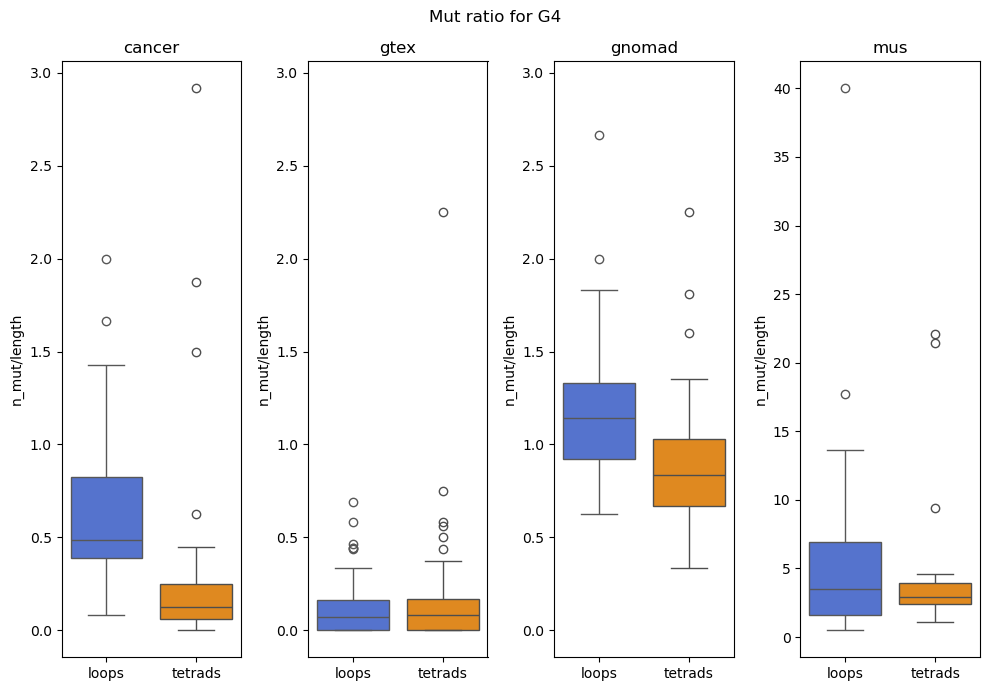

In [42]:
fig, axs = plt.subplots(1, 4, figsize=(10, 7))
data_name_list = ['cancer', 'gtex', 'gnomad', 'mus']
df_list = [[df_loop_cancer, df_tetrads_cancer], [df_loops_gtex, df_tetrads_gtex], 
           [df_loops_gnom, df_tetrads_gnom], [df_loop_mut_mus, df_tetrads_mut_mus]]

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
# order = [-45, -30, -15, 0, 15, 30, 45]

for i, data_name, df in zip([*range(len(data_name_list))], data_name_list, df_list):
    row = i % 4
    sns.boxplot(data=df[0], 
                 x='side', y='n_mut/length', ax=axs[row], color=colors[0]) \
        .set(title=data_name, xlabel=None)
    sns.boxplot(data=df[1], 
                 x='side', y='n_mut/length', ax=axs[row], color=colors[1]) \
        .set(title=data_name, xlabel=None)

axs[1].sharey(axs[0])
axs[2].sharey(axs[0])

# # Create custom legend handles and labels
# handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
# labels = ['Loops', 'Tetrads']

# # Add legend with custom handles and labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# # axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])

plt.suptitle('Mut ratio for G4')

plt.tight_layout()
plt.show()

## Common plot for Mut ratio (n_mut/length)
#### gnom AF_het < 0,0001 , helix AF_het < 0,00005

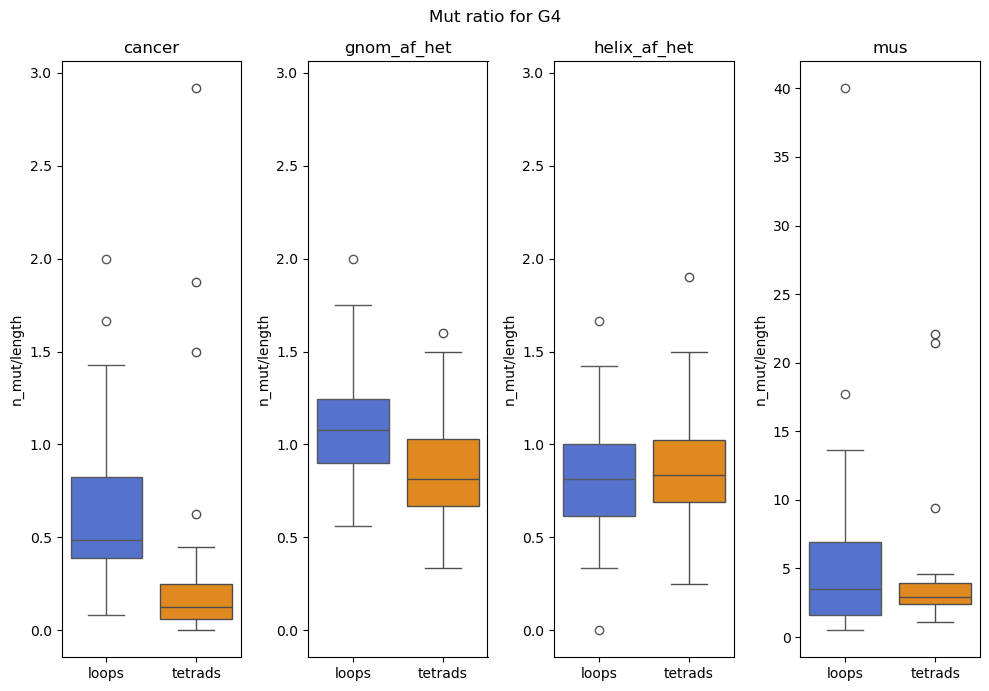

In [44]:
fig, axs = plt.subplots(1, 4, figsize=(10, 7))
data_name_list = ['cancer', 'gnom_af_het', 'helix_af_het', 'mus']
df_list = [[df_loop_cancer, df_tetrads_cancer], [df_loops_gnom_af_het, df_tetrads_gnom_af_het], 
           [df_loops_helix_af_het, df_tetrads_helix_af_het], [df_loop_mut_mus, df_tetrads_mut_mus]]

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
# order = [-45, -30, -15, 0, 15, 30, 45]

for i, data_name, df in zip([*range(len(data_name_list))], data_name_list, df_list):
    row = i % 4
    sns.boxplot(data=df[0], 
                 x='side', y='n_mut/length', ax=axs[row], color=colors[0]) \
        .set(title=data_name, xlabel=None)
    sns.boxplot(data=df[1], 
                 x='side', y='n_mut/length', ax=axs[row], color=colors[1]) \
        .set(title=data_name, xlabel=None)

axs[1].sharey(axs[0])
axs[2].sharey(axs[0])

# # Create custom legend handles and labels
# handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
# labels = ['Loops', 'Tetrads']

# # Add legend with custom handles and labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# # axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])

plt.suptitle('Mut ratio for G4')

plt.tight_layout()
plt.show()

#### gnom AF_het < 0,00001 , helix AF_het < 0,00001 (do not reran)

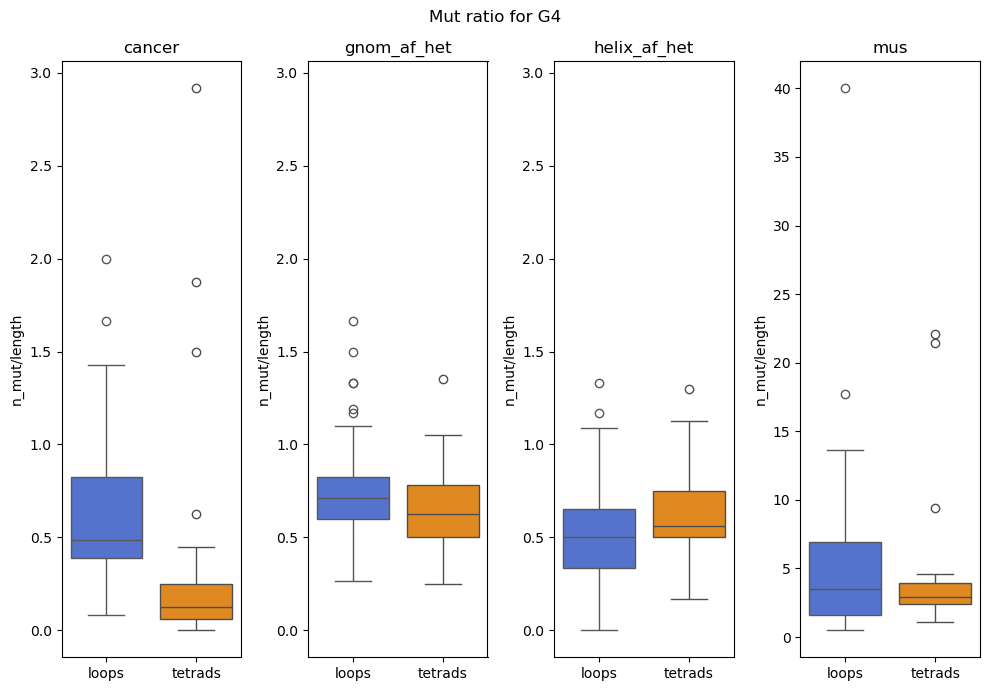

In [51]:
fig, axs = plt.subplots(1, 4, figsize=(10, 7))
data_name_list = ['cancer', 'gnom_af_het', 'helix_af_het', 'mus']
df_list = [[df_loop_cancer, df_tetrads_cancer], [df_loops_gnom_af_het, df_tetrads_gnom_af_het], 
           [df_loops_helix_af_het, df_tetrads_helix_af_het], [df_loop_mut_mus, df_tetrads_mut_mus]]

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
# order = [-45, -30, -15, 0, 15, 30, 45]

for i, data_name, df in zip([*range(len(data_name_list))], data_name_list, df_list):
    row = i % 4
    sns.boxplot(data=df[0], 
                 x='side', y='n_mut/length', ax=axs[row], color=colors[0]) \
        .set(title=data_name, xlabel=None)
    sns.boxplot(data=df[1], 
                 x='side', y='n_mut/length', ax=axs[row], color=colors[1]) \
        .set(title=data_name, xlabel=None)

axs[1].sharey(axs[0])
axs[2].sharey(axs[0])

# # Create custom legend handles and labels
# handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
# labels = ['Loops', 'Tetrads']

# # Add legend with custom handles and labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# # axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])

plt.suptitle('Mut ratio for G4')

plt.tight_layout()
plt.show()

## Common plot for Mut ratio (Normalising on MutSpec)
#### mutspec look in data_preparation

### Without D-loop

In [62]:
# A C G T
mutSpecs_gnom_wd_loop = [0.24327154864734377,
 0.2164950061125338,
 0.27844279785621256,
 0.2617906473839097]

In [64]:
mutSpecs_helix_wd_loop = [0.29264995816473227,
 0.2964707233207291,
 0.19238831712213897,
 0.21849100139239963]

In [76]:
mutSpecs_cancer_wd_loop = [0.04112244953486498,
 0.05057804811814163,
 0.7087115397940603,
 0.19958796255293318]

#### Count MutSpec for intervals (loops/tetrads) **gnom**

In [68]:
df_loops_gnom_af_het['MutSpec_wd_of_interval'] = df_loops_gnom_af_het['A']*mutSpecs_gnom_wd_loop[0] + df_loops_gnom_af_het['C']*mutSpecs_gnom_wd_loop[1] + \
    df_loops_gnom_af_het['G']*mutSpecs_gnom_wd_loop[2] + df_loops_gnom_af_het['T']*mutSpecs_gnom_wd_loop[3]

In [69]:
df_loops_gnom_af_het['n_mut/MutSpec_wd'] = df_loops_gnom_af_het['number_of_Mut']/df_loops_gnom_af_het['MutSpec_wd_of_interval']

In [70]:
df_tetrads_gnom_af_het['MutSpec_wd_of_interval'] = df_tetrads_gnom_af_het['A']*mutSpecs_gnom_wd_loop[0] + df_tetrads_gnom_af_het['C']*mutSpecs_gnom_wd_loop[1] + \
    df_tetrads_gnom_af_het['G']*mutSpecs_gnom_wd_loop[2] + df_tetrads_gnom_af_het['T']*mutSpecs_gnom_wd_loop[3]

In [71]:
df_tetrads_gnom_af_het['n_mut/MutSpec_wd'] = df_tetrads_gnom_af_het['number_of_Mut']/df_tetrads_gnom_af_het['MutSpec_wd_of_interval']

#### Count MutSpec for intervals (loops/tetrads) **helix**

In [72]:
df_loops_helix_af_het['MutSpec_wd_of_interval'] = df_loops_helix_af_het['A']*mutSpecs_helix_wd_loop[0] + df_loops_helix_af_het['C']*mutSpecs_helix_wd_loop[1] + \
    df_loops_helix_af_het['G']*mutSpecs_helix_wd_loop[2] + df_loops_helix_af_het['T']*mutSpecs_helix_wd_loop[3]

In [75]:
df_loops_helix_af_het['n_mut/MutSpec_wd'] = df_loops_helix_af_het['number_of_Mut']/df_loops_helix_af_het['MutSpec_wd_of_interval']

In [73]:
df_tetrads_helix_af_het['MutSpec_wd_of_interval'] = df_tetrads_helix_af_het['A']*mutSpecs_helix_wd_loop[0] + df_tetrads_helix_af_het['C']*mutSpecs_helix_wd_loop[1] + \
    df_tetrads_helix_af_het['G']*mutSpecs_helix_wd_loop[2] + df_tetrads_helix_af_het['T']*mutSpecs_helix_wd_loop[3]

In [74]:
df_tetrads_helix_af_het['n_mut/MutSpec_wd'] = df_tetrads_helix_af_het['number_of_Mut']/df_tetrads_helix_af_het['MutSpec_wd_of_interval']

#### Count MutSpec for intervals (loops/tetrads) **cancer**

In [77]:
df_loop_cancer['MutSpec_wd_of_interval'] = df_loop_cancer['A']*mutSpecs_cancer_wd_loop[0] + df_loop_cancer['C']*mutSpecs_cancer_wd_loop[1] + \
    df_loop_cancer['G']*mutSpecs_cancer_wd_loop[2] + df_loop_cancer['T']*mutSpecs_cancer_wd_loop[3]

In [78]:
df_loop_cancer['n_mut/MutSpec_wd'] = df_loop_cancer['number_of_Mut']/df_loop_cancer['MutSpec_wd_of_interval']

In [79]:
df_tetrads_cancer['MutSpec_wd_of_interval'] = df_tetrads_cancer['A']*mutSpecs_cancer_wd_loop[0] + df_tetrads_cancer['C']*mutSpecs_cancer_wd_loop[1] + \
    df_tetrads_cancer['G']*mutSpecs_cancer_wd_loop[2] + df_tetrads_cancer['T']*mutSpecs_cancer_wd_loop[3]

In [80]:
df_tetrads_cancer['n_mut/MutSpec_wd'] = df_tetrads_cancer['number_of_Mut']/df_tetrads_cancer['MutSpec_wd_of_interval']

### Plot wd_loop

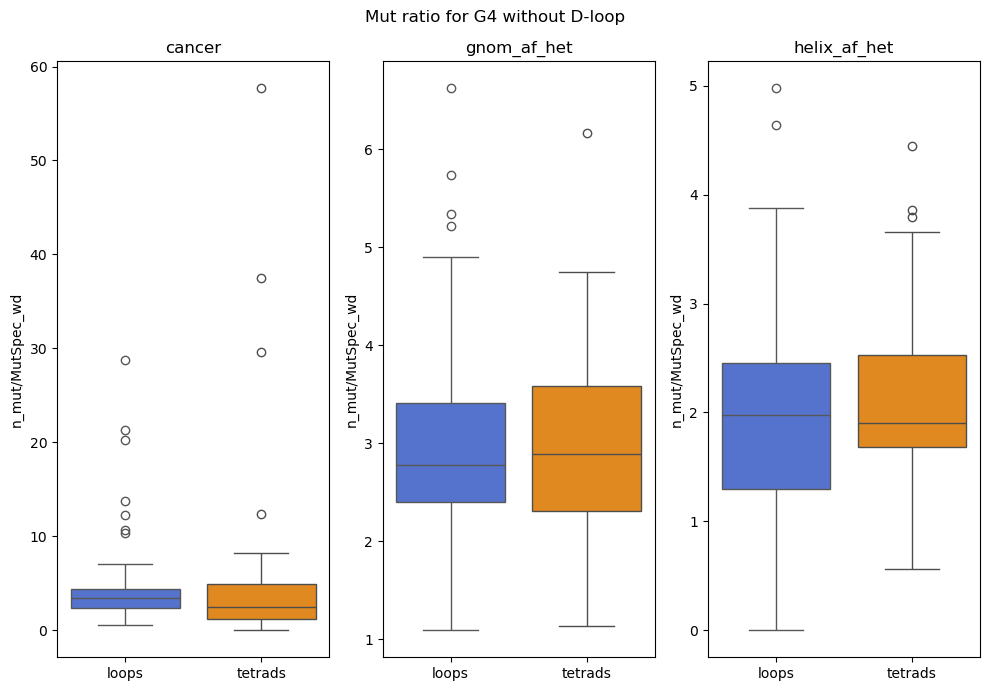

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(10, 7))
data_name_list = ['cancer', 'gnom_af_het', 'helix_af_het', 'mus']
df_list = [[df_loop_cancer, df_tetrads_cancer], [df_loops_gnom_af_het, df_tetrads_gnom_af_het], 
           [df_loops_helix_af_het, df_tetrads_helix_af_het]]

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
# order = [-45, -30, -15, 0, 15, 30, 45]

for i, data_name, df in zip([*range(len(data_name_list))], data_name_list, df_list):
    row = i % 3
    sns.boxplot(data=df[0], 
                 x='side', y='n_mut/MutSpec_wd', ax=axs[row], color=colors[0]) \
        .set(title=data_name, xlabel=None)
    sns.boxplot(data=df[1], 
                 x='side', y='n_mut/MutSpec_wd', ax=axs[row], color=colors[1]) \
        .set(title=data_name, xlabel=None)

# axs[1].sharey(axs[0])
# axs[2].sharey(axs[0])

# # Create custom legend handles and labels
# handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
# labels = ['Loops', 'Tetrads']

# # Add legend with custom handles and labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# # axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])

plt.suptitle('Mut ratio for G4 without D-loop')

plt.tight_layout()
plt.show()

### D-loop

In [66]:
# A C G T
mutSpecs_gnom_d_loop = [0.27765464680177154,
 0.22994290178765142,
 0.2490618944614847,
 0.24334055694909235]

In [67]:
mutSpecs_helix_d_loop = [0.26641798667287353,
 0.25613318535843865,
 0.23876647501928563,
 0.23868235294940218]

In [81]:
mutSpecs_cancer_d_loop = [0.11301911530513416,
 0.24119631452771007,
 0.39754803164886576,
 0.2482365385182901]

#### Count MutSpec for intervals (loops/tetrads) **gnom**

In [82]:
df_loops_gnom_af_het['MutSpec_d_of_interval'] = df_loops_gnom_af_het['A']*mutSpecs_gnom_d_loop[0] + df_loops_gnom_af_het['C']*mutSpecs_gnom_d_loop[1] + \
    df_loops_gnom_af_het['G']*mutSpecs_gnom_d_loop[2] + df_loops_gnom_af_het['T']*mutSpecs_gnom_d_loop[3]

In [83]:
df_loops_gnom_af_het['n_mut/MutSpec_d'] = df_loops_gnom_af_het['number_of_Mut']/df_loops_gnom_af_het['MutSpec_d_of_interval']

In [84]:
df_tetrads_gnom_af_het['MutSpec_d_of_interval'] = df_tetrads_gnom_af_het['A']*mutSpecs_gnom_d_loop[0] + df_tetrads_gnom_af_het['C']*mutSpecs_gnom_d_loop[1] + \
    df_tetrads_gnom_af_het['G']*mutSpecs_gnom_d_loop[2] + df_tetrads_gnom_af_het['T']*mutSpecs_gnom_d_loop[3]

In [85]:
df_tetrads_gnom_af_het['n_mut/MutSpec_d'] = df_tetrads_gnom_af_het['number_of_Mut']/df_tetrads_gnom_af_het['MutSpec_d_of_interval']

#### Count MutSpec for intervals (loops/tetrads) **helix**

In [86]:
df_loops_helix_af_het['MutSpec_d_of_interval'] = df_loops_helix_af_het['A']*mutSpecs_helix_d_loop[0] + df_loops_helix_af_het['C']*mutSpecs_helix_d_loop[1] + \
    df_loops_helix_af_het['G']*mutSpecs_helix_d_loop[2] + df_loops_helix_af_het['T']*mutSpecs_helix_d_loop[3]

In [87]:
df_loops_helix_af_het['n_mut/MutSpec_d'] = df_loops_helix_af_het['number_of_Mut']/df_loops_helix_af_het['MutSpec_d_of_interval']

In [88]:
df_tetrads_helix_af_het['MutSpec_d_of_interval'] = df_tetrads_helix_af_het['A']*mutSpecs_helix_d_loop[0] + df_tetrads_helix_af_het['C']*mutSpecs_helix_d_loop[1] + \
    df_tetrads_helix_af_het['G']*mutSpecs_helix_d_loop[2] + df_tetrads_helix_af_het['T']*mutSpecs_helix_d_loop[3]

In [89]:
df_tetrads_helix_af_het['n_mut/MutSpec_d'] = df_tetrads_helix_af_het['number_of_Mut']/df_tetrads_helix_af_het['MutSpec_d_of_interval']

#### Count MutSpec for intervals (loops/tetrads) **cancer**

In [90]:
df_loop_cancer['MutSpec_d_of_interval'] = df_loop_cancer['A']*mutSpecs_cancer_d_loop[0] + df_loop_cancer['C']*mutSpecs_cancer_d_loop[1] + \
    df_loop_cancer['G']*mutSpecs_cancer_d_loop[2] + df_loop_cancer['T']*mutSpecs_cancer_d_loop[3]

In [91]:
df_loop_cancer['n_mut/MutSpec_d'] = df_loop_cancer['number_of_Mut']/df_loop_cancer['MutSpec_d_of_interval']

In [92]:
df_tetrads_cancer['MutSpec_d_of_interval'] = df_tetrads_cancer['A']*mutSpecs_cancer_d_loop[0] + df_tetrads_cancer['C']*mutSpecs_cancer_d_loop[1] + \
    df_tetrads_cancer['G']*mutSpecs_cancer_d_loop[2] + df_tetrads_cancer['T']*mutSpecs_cancer_d_loop[3]

In [93]:
df_tetrads_cancer['n_mut/MutSpec_d'] = df_tetrads_cancer['number_of_Mut']/df_tetrads_cancer['MutSpec_d_of_interval']

### Plot d_loop

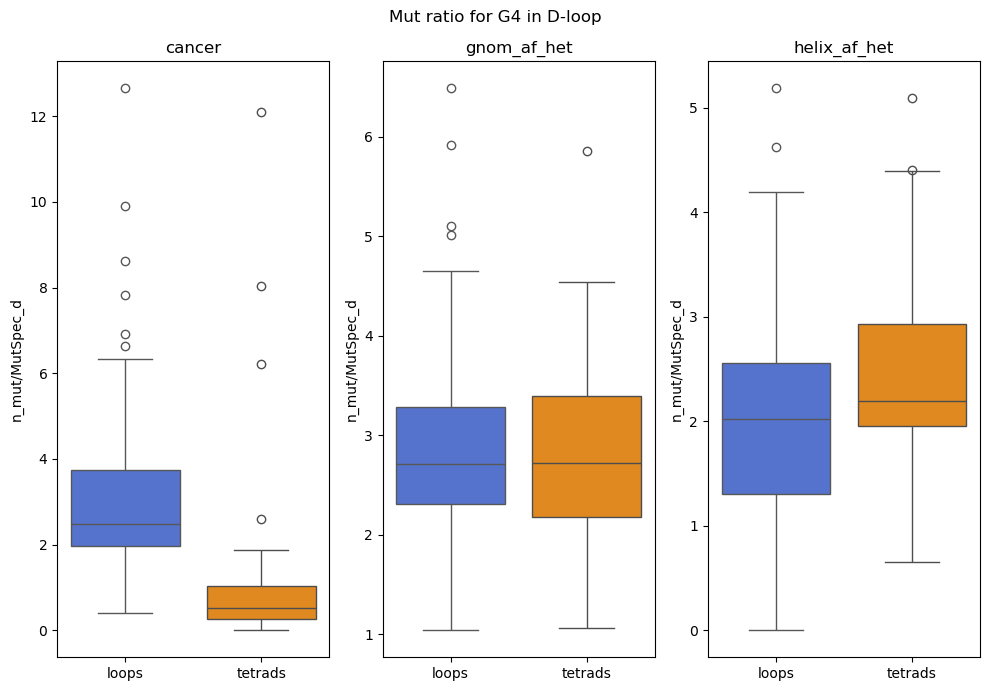

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(10, 7))
data_name_list = ['cancer', 'gnom_af_het', 'helix_af_het', 'mus']
df_list = [[df_loop_cancer, df_tetrads_cancer], [df_loops_gnom_af_het, df_tetrads_gnom_af_het], 
           [df_loops_helix_af_het, df_tetrads_helix_af_het]]

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
# order = [-45, -30, -15, 0, 15, 30, 45]

for i, data_name, df in zip([*range(len(data_name_list))], data_name_list, df_list):
    row = i % 3
    sns.boxplot(data=df[0], 
                 x='side', y='n_mut/MutSpec_d', ax=axs[row], color=colors[0]) \
        .set(title=data_name, xlabel=None)
    sns.boxplot(data=df[1], 
                 x='side', y='n_mut/MutSpec_d', ax=axs[row], color=colors[1]) \
        .set(title=data_name, xlabel=None)

# axs[1].sharey(axs[0])
# axs[2].sharey(axs[0])

# # Create custom legend handles and labels
# handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[1])]
# labels = ['Loops', 'Tetrads']

# # Add legend with custom handles and labels
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# # axs[0].set_xticklabels(['N upstream', 'G4', 'N downstream'])

plt.suptitle('Mut ratio for G4 in D-loop')

plt.tight_layout()
plt.show()